<a href="https://colab.research.google.com/github/olivia-sp/h2-station-dev/blob/main/station_model_total_v0_8_olivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ver0.1 - EDA
#ver0.2 - EDA 업데이트 및 모델 개선


# EDA

In [2]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
import os

if os.path.isfile('/content/content/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv') == True:
  print('already')
else:
  #os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv

% cd /content


[Errno 2] No such file or directory: 'data_set'
/content
--2022-03-24 02:04:40--  https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-03-24 02:04:40 ERROR 404: Not Found.

/content


In [4]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv'



In [5]:
df_raw_data = pd.read_csv(RAW_PATH, index_col=0)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77436
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  bool   
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   filename            77222 non-null  object 
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  decision_car_num    76980 non-null  object 
 11  humid               46123 non-null  float64
 12  max_car_num         76907 non-null  float64
 13  year                77222 non-null  int64  
 14  month               77222 non-null  int64  
 15  day                 77222 non-null  int64  
 16  hour

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
filename                  0
precipitation         31099
total_car_num             0
day_week                  0
decision_car_num        242
humid                 31099
max_car_num             315
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [6]:
df_raw_data = df_raw_data.reset_index()

In [6]:
df_raw_data2=df_raw_data.drop(['decision_car_num', 'max_car_num', 'filename', 'index'], axis=1)
df_raw_data2.isnull().sum()

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
precipitation         31099
total_car_num             0
day_week                  0
humid                 31099
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [7]:
df_raw_data2

,holiday,weekend,time,precipitation_type,temperature,station_name,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
0,False,False,2020-09-17-21h-20m-28s,0.0,23.0,26,0.0,2,thu,52.0,2020,9,17,21,20,28
1,False,False,2020-09-17-21h-38m-08s,0.0,23.0,26,0.0,3,thu,52.0,2020,9,17,21,38,8
2,False,False,2020-09-18-16h-45m-41s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,45,41
3,False,False,2020-09-18-16h-50m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,50,0
4,False,False,2020-09-18-16h-55m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,False,False,2022-01-06-16h-40m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,40,0
77218,False,False,2022-01-06-16h-45m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,45,0
77219,False,False,2022-01-06-16h-50m-00s,NaN,NaN,26,NaN,4,thu,NaN,2022,1,6,16,50,0
77220,False,False,2022-01-06-16h-55m-00s,NaN,NaN,26,NaN,2,thu,NaN,2022,1,6,16,55,0


Holiday 처리

In [ ]:
!pip install holidays

In [ ]:
# Holiday Data 추가   
import holidays

time_df = pd.DataFrame(df_raw_data2['time'])
time_df['time'] = pd.to_datetime(time_df['time'], format='%Y-%m-%d-%Hh-%Mm-%Ss', errors='raise')
time_df['date'] = time_df['time'].dt.date

holiday_list = time_df['date']


Year 끝 두자리로 변환

In [ ]:
#Year 끝 2자리 사용
time_df['year'] = time_df['time'].dt.strftime("%y")
time_df['year']
# time_df['year'] = time_df['time2'].dt.year

0        20
1        20
2        20
3        20
4        20
         ..
77217    22
77218    22
77219    22
77220    22
77221    22
Name: year, Length: 77222, dtype: object

In [ ]:
# 한국 휴일 개체 생성
kr_holidays = holidays.KR()

# generate holiday table 
holiday_df = pd.DataFrame(columns=['ds', 'imp_holiday'])
holiday_df['ds'] = holiday_list
holiday_df['imp_holiday'] = holiday_df.ds.apply(lambda x: 'True' if x in kr_holidays else 'False')

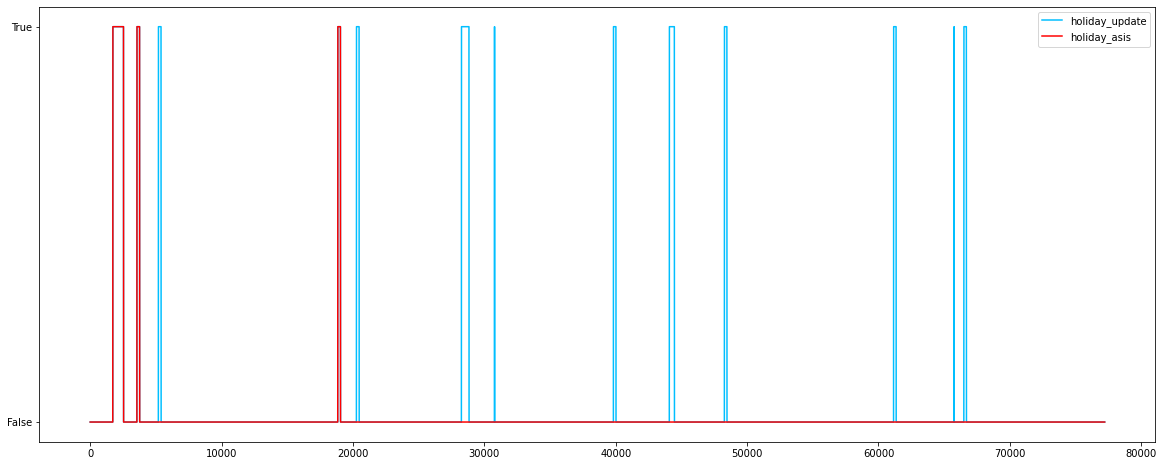

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)


chart.plot(holiday_df['imp_holiday'], color='deepskyblue' , label='holiday_update')
chart.plot(df_raw_data2['holiday'], color='red' , label='holiday_asis')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

In [ ]:
df_raw_data2['year'] = time_df['year'].astype(int)
df_raw_data2['holiday'] = holiday_df['imp_holiday']

Season 데이터 생성

In [ ]:
def SeasonData(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'autumn'

df_raw_data2['season'] = df_raw_data2.month.apply(SeasonData)

Hour_group 데이터 생성
- Dawn 0시~7시
- Morning 7시~12시
- Lunch 12시~13시
- Day 13시~18시
- Dinner 18시~19시
- Night 19시~0시

In [ ]:
def HourGroupData(hour):
    if hour in [1,2,3,4,5,6]:
        return 'dawn'
    elif hour in [7,8,9,10,11]:
        return 'morning'
    elif hour in [12]:
        return 'lunch'
    elif hour in [13,14,15,16,17]:
        return 'afternoon'
    elif hour in [18]:
      return 'dinner'
    elif hour in [19, 20, 21, 22, 23, 0]:
      return 'night'

df_raw_data2['hour_group'] = df_raw_data2.hour.apply(HourGroupData)

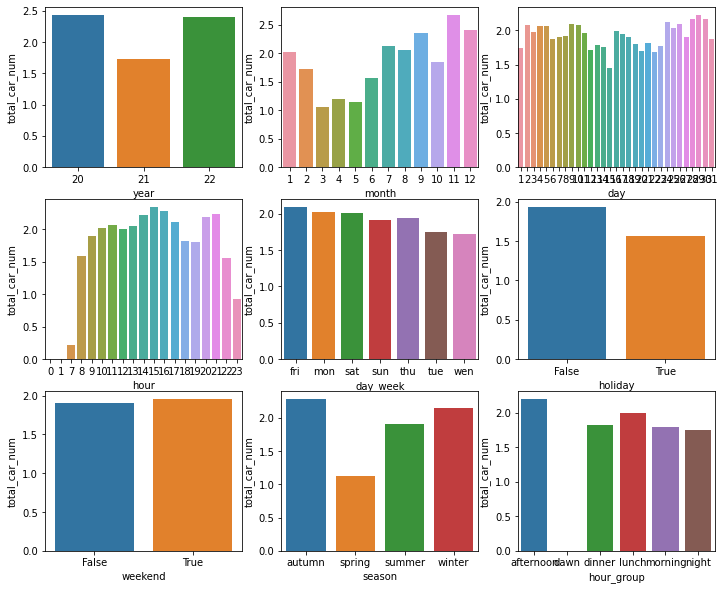

In [ ]:
#year와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.barplot(x='year',y='total_car_num',data=df_raw_data2.groupby('year')['total_car_num'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(3,3,2)
ax2 = sns.barplot(x='month',y='total_car_num',data=df_raw_data2.groupby('month')['total_car_num'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(3,3,3)
ax3 = sns.barplot(x='day',y='total_car_num',data=df_raw_data2.groupby('day')['total_car_num'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(3,3,4)
ax4 = sns.barplot(x='hour',y='total_car_num',data=df_raw_data2.groupby('hour')['total_car_num'].mean().reset_index())

#day_week과 count
ax5 = fig.add_subplot(3,3,5)
ax5 = sns.barplot(x='day_week',y='total_car_num',data=df_raw_data2.groupby('day_week')['total_car_num'].mean().reset_index())

#holiday와 count
ax6 = fig.add_subplot(3,3,6)
ax6 = sns.barplot(x='holiday',y='total_car_num',data=df_raw_data2.groupby('holiday')['total_car_num'].mean().reset_index())

#weekend와 count
ax7 = fig.add_subplot(3,3,7)
ax7 = sns.barplot(x='weekend',y='total_car_num',data=df_raw_data2.groupby('weekend')['total_car_num'].mean().reset_index())

#season과 count
ax8 = fig.add_subplot(3,3,8)
ax8 = sns.barplot(x='season',y='total_car_num',data=df_raw_data2.groupby('season')['total_car_num'].mean().reset_index())

#hour_group과 count
ax9 = fig.add_subplot(3,3,9)
ax9 = sns.barplot(x='hour_group',y='total_car_num',data=df_raw_data2.groupby('hour_group')['total_car_num'].mean().reset_index())

In [ ]:
# sns.pairplot(df_raw_data2, height=5);
# plt.show()

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_raw_data2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
df_raw_data2.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data2.info()

df_raw_data2.drop('time', axis=1, inplace = True)
df_raw_data2.info()

# df_raw_data2['day_week'].replace('mon', 0, inplace = True)
# df_raw_data2['day_week'].replace('tue', 1, inplace = True)
# df_raw_data2['day_week'].replace('wen', 2, inplace = True)
# df_raw_data2['day_week'].replace('thu', 3, inplace = True)
# df_raw_data2['day_week'].replace('fri', 4, inplace = True)
# df_raw_data2['day_week'].replace('sat', 5, inplace = True)
# df_raw_data2['day_week'].replace('sun', 6, inplace = True)

df_raw_data2['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data2['weekend'] = df_raw_data['weekend'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  object 
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   precipitation       46123 non-null  float64
 7   total_car_num       77222 non-null  int64  
 8   day_week            77222 non-null  object 
 9   humid               46123 non-null  float64
 10  year                77222 non-null  int64  
 11  month               77222 non-null  int64  
 12  day                 77222 non-null  int64  
 13  hour                77222 non-null  int64  
 14  minute              77222 non-null  int64  
 15  second              77222 non-null  int64  
 16  seas

In [ ]:
day_week_dum = pd.get_dummies(df_raw_data2['day_week'])
# df_raw_data3 + day_week_dum
df_dum1 = df_raw_data2.join(day_week_dum,how='left')

In [ ]:
season_dum = pd.get_dummies(df_dum1['season'])
# df_raw_data3 + day_week_dum
df_dum2 = df_dum1.join(season_dum,how='left')

In [ ]:
hrgroup_dum = pd.get_dummies(df_dum2['hour_group'])
# df_raw_data3 + day_week_dum
df_dum3 = df_dum2.join(hrgroup_dum,how='left')

In [ ]:
df_raw_data3=df_dum3.drop(['day_week', 'season', 'hour_group'], axis=1)
df_raw_data3

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,total_car_num,humid,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,0.0,23.0,26,0.0,2,52.0,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0.0,23.0,26,0.0,3,52.0,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,NaN,NaN,26,NaN,4,NaN,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,NaN,NaN,26,NaN,2,NaN,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
#df_raw_data3.describe()

In [ ]:
df_raw_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  int64  
 1   weekend             77222 non-null  int64  
 2   precipitation_type  46123 non-null  float64
 3   temperature         46123 non-null  float64
 4   station_name        77222 non-null  int64  
 5   precipitation       46123 non-null  float64
 6   total_car_num       77222 non-null  int64  
 7   humid               46123 non-null  float64
 8   year                77222 non-null  int64  
 9   month               77222 non-null  int64  
 10  day                 77222 non-null  int64  
 11  hour                77222 non-null  int64  
 12  minute              77222 non-null  int64  
 13  second              77222 non-null  int64  
 14  fri                 77222 non-null  uint8  
 15  mon                 77222 non-null  uint8  
 16  sat 

결측값 처리

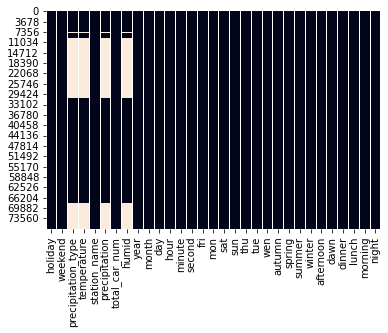

In [ ]:
%matplotlib inline
sns.heatmap(df_raw_data3.isnull(), cbar=False)

Data Imputation
1. mean/median : 작은 크기의 숫자형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 범주형 feature 사용 불가, 부정확함
2. most frequent/zero/constant : 범주형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 데이터 bias 생성 가능
3. KNN imputation : feature similarity  이용하여 근접한 데이터 찾음(impyute lib), 데이터셋에 따라 다르나 가장 정확함, 메모리 많이 필요, outlier에 민감
4. MICE : 누락된 데이터 여러번 채우는 방식, 연속형/이진형/범위형 패턴 처리 가능, imputation-analysis(m개의 완성된 데이터 분석)-pooling(평균,분산,신뢰구간 계산하여 합침)
5. 딥러닝 이용 : 범주형/non-numerical 데이터에 매우 효과적, DNN 이용해서 누락 값 유추, 한번에 한 컬럼만 대체 가능, 대규모 데이터셋은 속도가 상당히 느림, 유추할 feature에 대한 정보있는 feature 직접 지정해야 함
6. stochastic regression imputation : 동일 데이터셋의 다른 feature에서 결측값 예측
7. Extrapolation and Interpolation : 이산형 범위 내 데이터로부터 값 추정, interpolation(20살, 40살 데이터로 30살 추측), Extrapolation(1~20 데이터로 10년 후 예측, 안정성 떨어짐)
8. Hot-Deck Imputation : 비슷한 데이터셋에서 랜덤하게 선택


In [ ]:
df_null = df_raw_data3[['precipitation','precipitation_type', 'temperature', 'humid']]
df_raw_data4 = df_raw_data3.drop(['precipitation','precipitation_type', 'temperature', 'humid'], axis=1)
df_raw_data4

,holiday,weekend,station_name,total_car_num,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,26,2,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,26,3,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,26,4,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,26,4,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,26,4,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,26,3,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,26,3,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,26,4,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,26,2,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


MICE

In [ ]:
!pip3 install impyute

In [ ]:
#다른 컬럼 상관관계 파악 필요
df_null_mice = df_raw_data3

In [ ]:
#df_null_mice.info()

In [ ]:
from impyute.imputation.cs import mice
imp_mice = mice(df_null_mice.values) # mice 학습시작
df_mice = pd.DataFrame(imp_mice, columns=df_null_mice.columns)

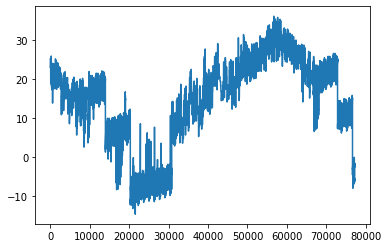

In [ ]:
df_mice['temperature'].plot()

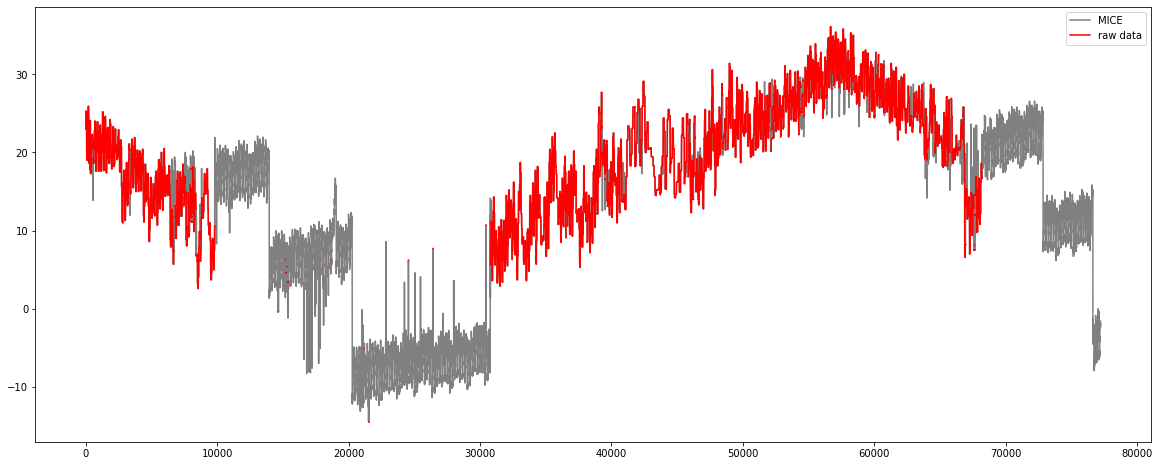

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mice['temperature'], color='gray' , label='MICE')
chart.plot(df_raw_data3['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

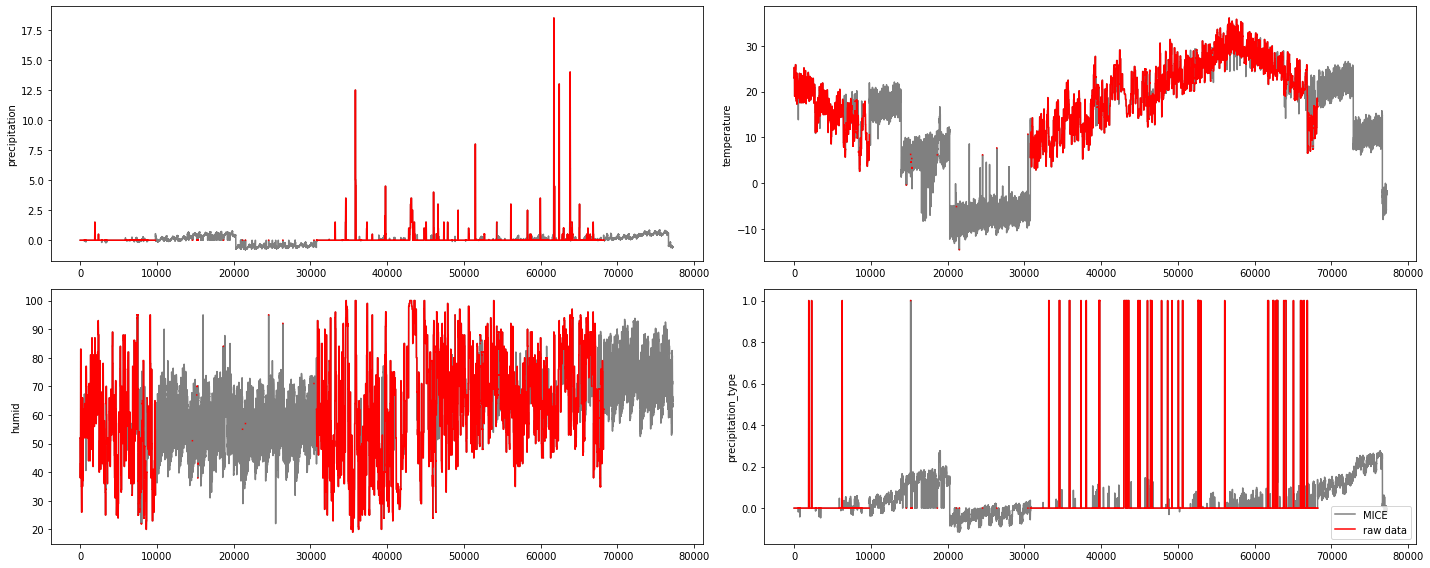

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_mice['precipitation'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_mice['temperature'], color='gray' , label='MICE')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_mice['humid'], color='gray' , label='MICE')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_mice['precipitation_type'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  float64
 1   weekend             77222 non-null  float64
 2   precipitation_type  77222 non-null  float64
 3   temperature         77222 non-null  float64
 4   station_name        77222 non-null  float64
 5   precipitation       77222 non-null  float64
 6   total_car_num       77222 non-null  float64
 7   humid               77222 non-null  float64
 8   year                77222 non-null  float64
 9   month               77222 non-null  float64
 10  day                 77222 non-null  float64
 11  hour                77222 non-null  float64
 12  minute              77222 non-null  float64
 13  second              77222 non-null  float64
 14  fri                 77222 non-null  float64
 15  mon                 77222 non-null  float64
 16  sat 

In [7]:
CURR_PATH = os.getcwd()
CURR_PATH

'/content'

In [8]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
SAVE_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/data_imputation_MICE.csv'

In [ ]:
df_mice.to_csv(SAVE_PATH, index=True)

NameError: ignored

#성능평가 - MICE

In [9]:
df_mice2 = pd.read_csv(SAVE_PATH, index_col=0)
df_mice2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  float64
 1   weekend             77222 non-null  float64
 2   precipitation_type  77222 non-null  float64
 3   temperature         77222 non-null  float64
 4   station_name        77222 non-null  float64
 5   precipitation       77222 non-null  float64
 6   total_car_num       77222 non-null  float64
 7   humid               77222 non-null  float64
 8   year                77222 non-null  float64
 9   month               77222 non-null  float64
 10  day                 77222 non-null  float64
 11  hour                77222 non-null  float64
 12  minute              77222 non-null  float64
 13  second              77222 non-null  float64
 14  fri                 77222 non-null  float64
 15  mon                 77222 non-null  float64
 16  sat 

모델 적용

In [10]:
df_new1 = df_mice2
df_new1 = df_new1[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [11]:
df_new1

,total_car_num,holiday,weekend,precipitation_type,temperature,station_name,precipitation,humid,year,month,...,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,2.0,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,3.0,0.0,0.0,-0.007549,-2.072277,26.0,-0.551757,63.498700,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77218,3.0,0.0,0.0,-0.007764,-2.106175,26.0,-0.552482,63.465866,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77219,4.0,0.0,0.0,-0.015678,-1.929549,26.0,-0.557765,62.786902,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77220,2.0,0.0,0.0,-0.000496,-2.384493,26.0,-0.549374,64.046330,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
# y = y. flatten()
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size = 0.2, 
#                                                     shuffle=False,
#                                                     )
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
#                                                     test_size = 0.2, 
#                                                     shuffle=False,
#                                                     )

# print('X_train :', X_train)
# print('X_valid :', X_valid)
# print('X_test :', X_test)
# print('y_train :', y_train)
# print('y_valid :', y_valid)
# print('y_test :', y_test)

In [13]:
df_new2=df_new1.drop(['total_car_num'], axis=1)
df_new2

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,humid,year,month,day,...,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,18.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,18.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,18.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0.0,0.0,-0.007549,-2.072277,26.0,-0.551757,63.498700,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77218,0.0,0.0,-0.007764,-2.106175,26.0,-0.552482,63.465866,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77219,0.0,0.0,-0.015678,-1.929549,26.0,-0.557765,62.786902,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77220,0.0,0.0,-0.000496,-2.384493,26.0,-0.549374,64.046330,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import pandas as pd
from sklearn import preprocessing

df_new2=df_new1.drop(['total_car_num'], axis=1)
scaler_x = df_new2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(scaler_x)
df_new2 = pd.DataFrame(x_scaled)


In [15]:
df_new3 = df_new2.join(df_new1[['total_car_num']],how='right')
df_new3.columns=['holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night','total_car_num']
df_new = df_new3[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [16]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_train :', X_train)
print('X_valid :', X_valid)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_valid :', y_valid)
print('y_test :', y_test)

X_train : [[0.         0.         0.10566096 ... 0.         0.         1.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]
 ...
 [0.         0.         0.10399736 ... 0.         1.         0.        ]
 [0.         1.         0.27210803 ... 0.         0.         1.        ]
 [0.         1.         0.13766331 ... 1.         0.         0.        ]]
X_valid : [[0.         0.         0.10399736 ... 0.         0.         1.        ]
 [0.         0.         0.10399736 ... 0.         1.         0.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]
 ...
 [1.         1.         0.10399736 ... 0.         0.         0.        ]
 [0.         1.         0.10399736 ... 0.         0.         0.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]]
X_test : [[0.         0.         0.10399736 ... 0.         0.         1.        ]
 [0.      

In [17]:
X_train_t = X_train.reshape(X_train.shape[0], 30, 1)
X_valid_t = X_valid.reshape(X_valid.shape[0], 30, 1)
X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 30, 1)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def confirm_result(y_test,y_pred):
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  #MSLE = mean_squared_log_error(y_test,y_pred)
  R2 = r2_score(y_test,y_pred)
  pd.options.display.float_format='{:.5f}'.format
  
  Result = pd.DataFrame(data=[MAE,RMSE,R2],index=['MAE','RMSE','R2'],columns=['Results'])
  return Result

#GRU

## GRU1,Dense1,adam

In [32]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


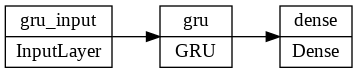

In [33]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [34]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.2935 - mean_squared_error: 2.2935 - val_loss: 2.2299 - val_mean_squared_error: 2.2299
Epoch 2/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.1348 - mean_squared_error: 2.1348 - val_loss: 2.0634 - val_mean_squared_error: 2.0634
Epoch 3/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.9913 - mean_squared_error: 1.9913 - val_loss: 1.9380 - val_mean_squared_error: 1.9380
Epoch 4/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9069 - mean_squared_error: 1.9069 - val_loss: 1.8774 - val_mean_squared_error: 1.8774
Epoch 5/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.8487 - mean_squared_error: 1.8487 - val_loss: 1.8273 - val_mean_squared_error: 1.8273
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.7949 - mean_squared_error: 1.7949 - val_loss: 1.7858 - val_mean_squared_error: 1.7858
Epoch 7/10

In [35]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [36]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6787 - mean_squared_error: 0.6787
MSE =  [0.6786603331565857, 0.6786603331565857]


In [37]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59691
RMSE,0.82381
R2,0.70364


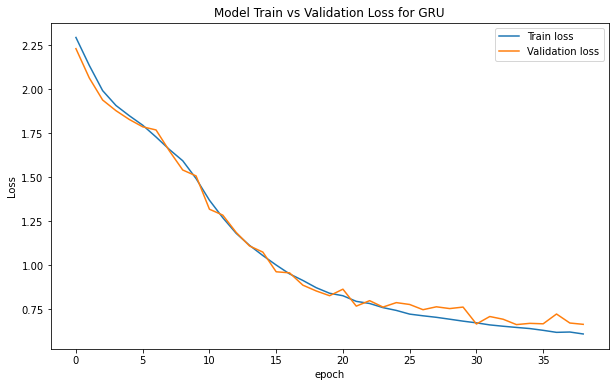

In [38]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(256),Dense1,adam - 0.4

In [128]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               198912    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 199,169
Trainable params: 199,169
Non-trainable params: 0
_________________________________________________________________


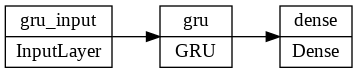

In [129]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [130]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 10s 5ms/step - loss: 2.2739 - mean_squared_error: 2.2739 - val_loss: 2.1525 - val_mean_squared_error: 2.1525
Epoch 2/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.0676 - mean_squared_error: 2.0676 - val_loss: 1.9907 - val_mean_squared_error: 1.9907
Epoch 3/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.9761 - mean_squared_error: 1.9761 - val_loss: 1.9270 - val_mean_squared_error: 1.9270
Epoch 4/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.8946 - mean_squared_error: 1.8946 - val_loss: 1.8213 - val_mean_squared_error: 1.8213
Epoch 5/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.7895 - mean_squared_error: 1.7895 - val_loss: 1.7261 - val_mean_squared_error: 1.7261
Epoch 6/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.6911 - mean_squared_error: 1.6911 - val_loss: 1.6266 - val_mean_squared_error: 1.6266
Epoch 7/1

In [131]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [132]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.5182 - mean_squared_error: 0.5182
MSE =  [0.5181667804718018, 0.5181667804718018]


In [133]:
confirm_result(y_test,y_pred)

,Results
MAE,0.49100
RMSE,0.71984
R2,0.77373


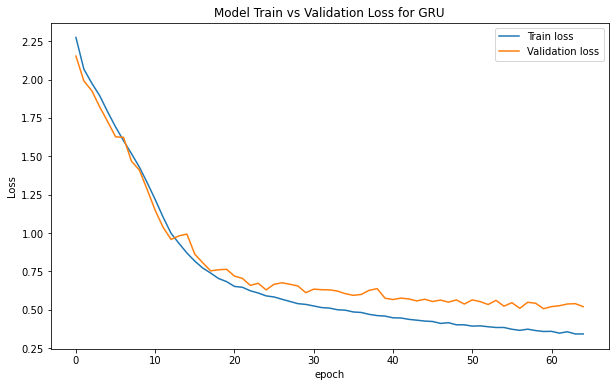

In [134]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,32),Dense1,adam -t

In [39]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=32))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 32)                27840     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 226,785
Trainable params: 226,785
Non-trainable params: 0
_________________________________________________________________


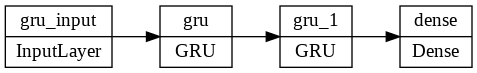

In [40]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [41]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.2465 - mean_squared_error: 2.2465 - val_loss: 2.1787 - val_mean_squared_error: 2.1787
Epoch 2/100
1545/1545 [==============================] - 10s 7ms/step - loss: 2.0371 - mean_squared_error: 2.0371 - val_loss: 1.9357 - val_mean_squared_error: 1.9357
Epoch 3/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.9336 - mean_squared_error: 1.9336 - val_loss: 1.8836 - val_mean_squared_error: 1.8836
Epoch 4/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.8603 - mean_squared_error: 1.8603 - val_loss: 1.8454 - val_mean_squared_error: 1.8454
Epoch 5/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.7763 - mean_squared_error: 1.7763 - val_loss: 1.7725 - val_mean_squared_error: 1.7725
Epoch 6/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.6964 - mean_squared_error: 1.6964 - val_loss: 1.6569 - val_mean_squared_error: 1.6569
Epoc

In [42]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [43]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.5604 - mean_squared_error: 0.5604
MSE =  [0.5603947043418884, 0.5603947043418884]


In [44]:
confirm_result(y_test,y_pred)

,Results
MAE,0.53072
RMSE,0.74860
R2,0.75529


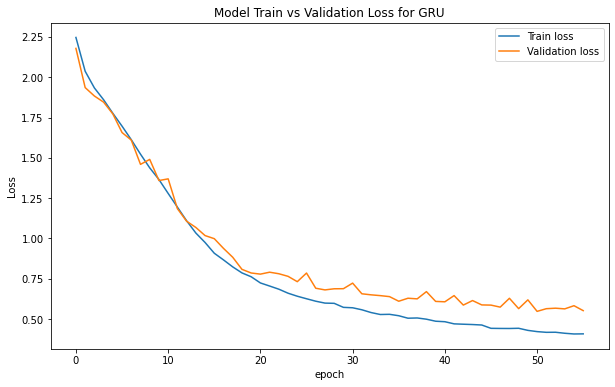

In [45]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,32),Dense1,RMSprop -t

In [135]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=32))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 32)                27840     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 226,785
Trainable params: 226,785
Non-trainable params: 0
_________________________________________________________________


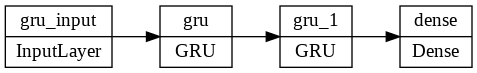

In [136]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [137]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 14s 7ms/step - loss: 2.2442 - mean_squared_error: 2.2442 - val_loss: 2.1165 - val_mean_squared_error: 2.1165
Epoch 2/100
1545/1545 [==============================] - 10s 7ms/step - loss: 2.0384 - mean_squared_error: 2.0384 - val_loss: 2.0739 - val_mean_squared_error: 2.0739
Epoch 3/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9312 - mean_squared_error: 1.9312 - val_loss: 1.9399 - val_mean_squared_error: 1.9399
Epoch 4/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8746 - mean_squared_error: 1.8746 - val_loss: 1.8908 - val_mean_squared_error: 1.8908
Epoch 5/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8085 - mean_squared_error: 1.8085 - val_loss: 1.8032 - val_mean_squared_error: 1.8032
Epoch 6/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.7615 - mean_squared_error: 1.7615 - val_loss: 1.7506 - val_mean_squared_error: 1.7506
Epoc

In [138]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [139]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.7112 - mean_squared_error: 0.7112
MSE =  [0.7112314105033875, 0.7112314105033875]


In [140]:
confirm_result(y_test,y_pred)

,Results
MAE,0.62053
RMSE,0.84335
R2,0.68942


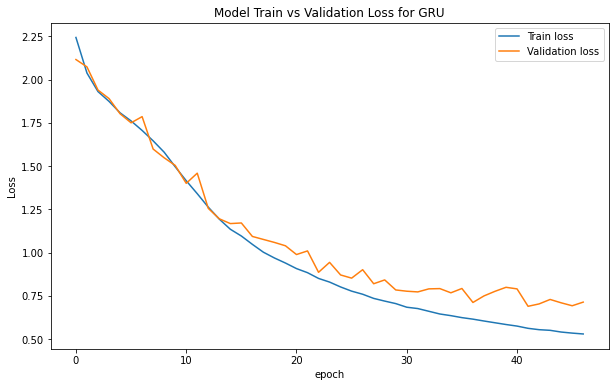

In [141]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,128),Dense1,adam -t

In [46]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


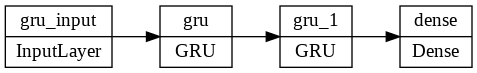

In [47]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [48]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 14s 7ms/step - loss: 2.2429 - mean_squared_error: 2.2429 - val_loss: 2.1393 - val_mean_squared_error: 2.1393
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0292 - mean_squared_error: 2.0292 - val_loss: 1.9634 - val_mean_squared_error: 1.9634
Epoch 3/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9156 - mean_squared_error: 1.9156 - val_loss: 1.8399 - val_mean_squared_error: 1.8399
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8167 - mean_squared_error: 1.8167 - val_loss: 1.8728 - val_mean_squared_error: 1.8728
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.7336 - mean_squared_error: 1.7336 - val_loss: 1.6812 - val_mean_squared_error: 1.6812
Epoch 6/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.6539 - mean_squared_error: 1.6539 - val_loss: 1.5819 - val_mean_squared_error: 1.5819
Epoc

In [49]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [50]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.5622 - mean_squared_error: 0.5622
MSE =  [0.5621903538703918, 0.5621903538703918]


In [51]:
confirm_result(y_test,y_pred)

,Results
MAE,0.52271
RMSE,0.74979
R2,0.75450


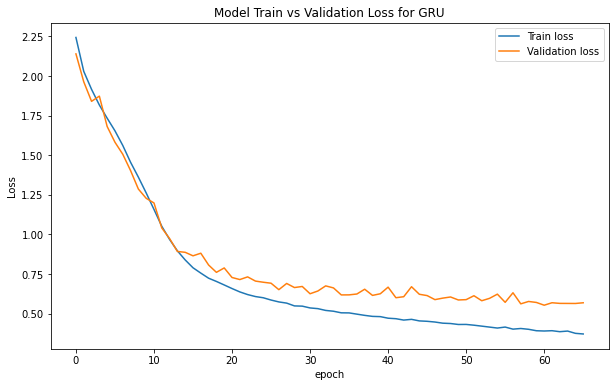

In [52]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,128),Dense1,RMSprop -t

In [142]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


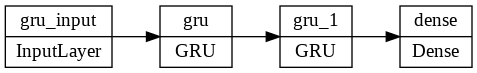

In [143]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [144]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 14s 7ms/step - loss: 2.2727 - mean_squared_error: 2.2727 - val_loss: 2.2095 - val_mean_squared_error: 2.2095
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.1204 - mean_squared_error: 2.1204 - val_loss: 2.0544 - val_mean_squared_error: 2.0544
Epoch 3/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9438 - mean_squared_error: 1.9438 - val_loss: 2.1163 - val_mean_squared_error: 2.1163
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8566 - mean_squared_error: 1.8566 - val_loss: 1.9067 - val_mean_squared_error: 1.9067
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.7814 - mean_squared_error: 1.7814 - val_loss: 1.7458 - val_mean_squared_error: 1.7458
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.7033 - mean_squared_error: 1.7033 - val_loss: 1.6744 - val_mean_squared_error: 1.6744
Epoc

In [145]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [146]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6362 - mean_squared_error: 0.6362
MSE =  [0.6362359523773193, 0.6362359523773193]


In [147]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57758
RMSE,0.79764
R2,0.72217


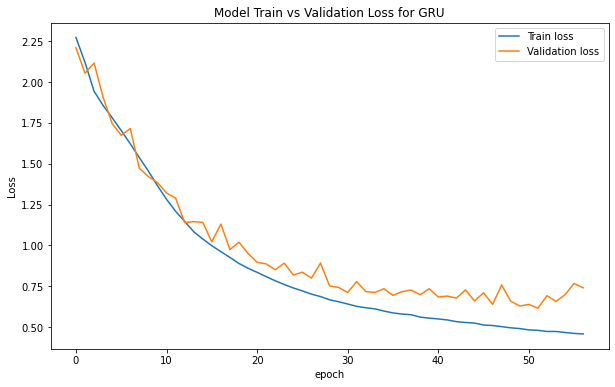

In [148]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,256),Dense1,adam

In [53]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=256))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 593,921
Trainable params: 593,921
Non-trainable params: 0
_________________________________________________________________


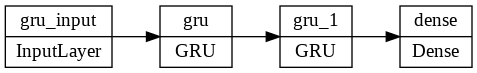

In [54]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [55]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 15s 8ms/step - loss: 2.2689 - mean_squared_error: 2.2689 - val_loss: 2.1820 - val_mean_squared_error: 2.1820
Epoch 2/100
1545/1545 [==============================] - 12s 8ms/step - loss: 2.0644 - mean_squared_error: 2.0644 - val_loss: 1.9943 - val_mean_squared_error: 1.9943
Epoch 3/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.9307 - mean_squared_error: 1.9307 - val_loss: 1.8885 - val_mean_squared_error: 1.8885
Epoch 4/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.8357 - mean_squared_error: 1.8357 - val_loss: 1.7438 - val_mean_squared_error: 1.7438
Epoch 5/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.7072 - mean_squared_error: 1.7072 - val_loss: 1.5974 - val_mean_squared_error: 1.5974
Epoch 6/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.5640 - mean_squared_error: 1.5640 - val_loss: 1.4950 - val_mean_squared_error: 1.4950
Epoc

In [56]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [57]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 4ms/step - loss: 0.6587 - mean_squared_error: 0.6587
MSE =  [0.6586984992027283, 0.6586984992027283]


In [58]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59269
RMSE,0.81160
R2,0.71236


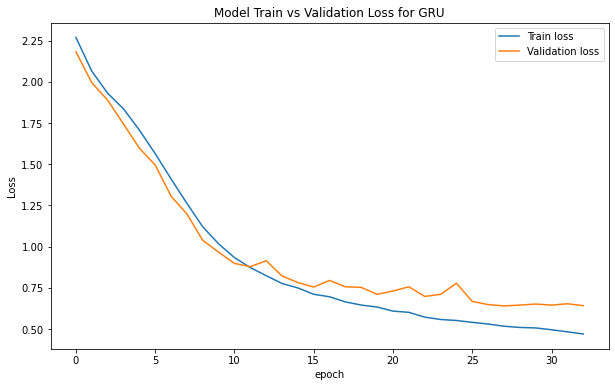

In [59]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512),Dense1,adam - 0.52 -t

In [149]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 791,553
Trainable params: 791,553
Non-trainable params: 0
_________________________________________________________________


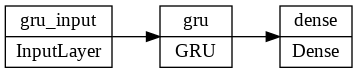

In [150]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [151]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.3549 - mean_squared_error: 2.3549 - val_loss: 2.1962 - val_mean_squared_error: 2.1962
Epoch 2/100
1545/1545 [==============================] - 10s 7ms/step - loss: 2.0767 - mean_squared_error: 2.0767 - val_loss: 2.0673 - val_mean_squared_error: 2.0673
Epoch 3/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9742 - mean_squared_error: 1.9742 - val_loss: 1.9740 - val_mean_squared_error: 1.9740
Epoch 4/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9142 - mean_squared_error: 1.9142 - val_loss: 1.8533 - val_mean_squared_error: 1.8533
Epoch 5/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8612 - mean_squared_error: 1.8612 - val_loss: 1.8151 - val_mean_squared_error: 1.8151
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.7932 - mean_squared_error: 1.7932 - val_loss: 1.7455 - val_mean_squared_error: 1.7455
Epoc

In [152]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [153]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.5458 - mean_squared_error: 0.5458
MSE =  [0.5457860231399536, 0.5457860231399536]


In [154]:
confirm_result(y_test,y_pred)

,Results
MAE,0.50826
RMSE,0.73877
R2,0.76167


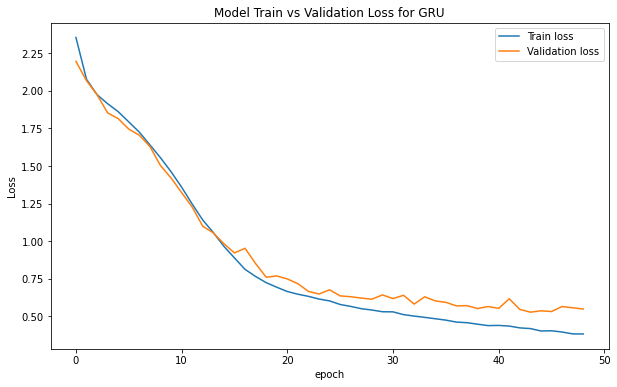

In [155]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512),Dense1,RMSprop -t

In [60]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 791,553
Trainable params: 791,553
Non-trainable params: 0
_________________________________________________________________


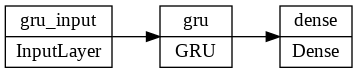

In [61]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [62]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.3094 - mean_squared_error: 2.3094 - val_loss: 2.0798 - val_mean_squared_error: 2.0798
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0121 - mean_squared_error: 2.0121 - val_loss: 1.9988 - val_mean_squared_error: 1.9988
Epoch 3/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8954 - mean_squared_error: 1.8954 - val_loss: 1.8487 - val_mean_squared_error: 1.8487
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8120 - mean_squared_error: 1.8120 - val_loss: 1.7341 - val_mean_squared_error: 1.7341
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.6937 - mean_squared_error: 1.6937 - val_loss: 1.6486 - val_mean_squared_error: 1.6486
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.5161 - mean_squared_error: 1.5161 - val_loss: 1.5163 - val_mean_squared_error: 1.5163
Epoc

In [63]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [64]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.5881 - mean_squared_error: 0.5881
MSE =  [0.5880959033966064, 0.5880959033966064]


In [65]:
confirm_result(y_test,y_pred)

,Results
MAE,0.53655
RMSE,0.76687
R2,0.74319


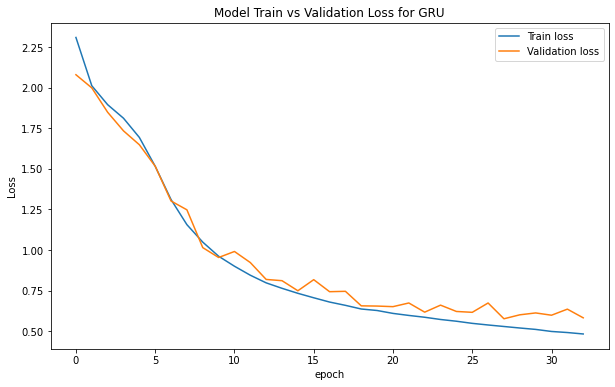

In [66]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1,Dense3(128,64,32,1),Drop2,Adam

In [156]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(64))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(32))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60,673
Trainable params: 60,673
Non-traina

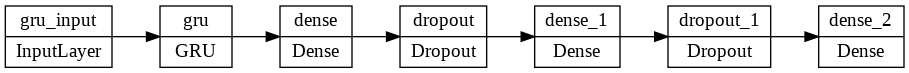

In [157]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [158]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.4274 - mean_squared_error: 2.4274 - val_loss: 2.2521 - val_mean_squared_error: 2.2521
Epoch 2/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.2706 - mean_squared_error: 2.2706 - val_loss: 2.1398 - val_mean_squared_error: 2.1398
Epoch 3/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.1594 - mean_squared_error: 2.1594 - val_loss: 2.1001 - val_mean_squared_error: 2.1001
Epoch 4/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.1037 - mean_squared_error: 2.1037 - val_loss: 2.0449 - val_mean_squared_error: 2.0449
Epoch 5/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.0625 - mean_squared_error: 2.0625 - val_loss: 2.0103 - val_mean_squared_error: 2.0103
Epoch 6/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.0361 - mean_squared_error: 2.0361 - val_loss: 1.9860 - val_mean_squared_error: 1.9860
Epoch 7/10

In [159]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [160]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6442 - mean_squared_error: 0.6442
MSE =  [0.644172191619873, 0.644172191619873]


In [161]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57771
RMSE,0.80260
R2,0.71870


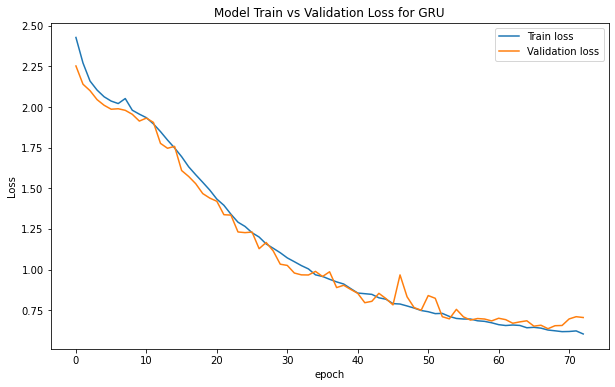

In [162]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1,Dense3,(64,32,16,1),Drop1,Adam

In [67]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=64,input_shape=(30, 1)))
model_gru.add(Dense(32))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(16))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


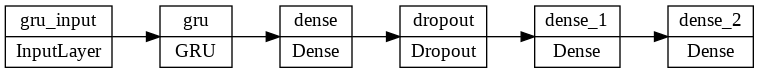

In [68]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 10s 5ms/step - loss: 2.3457 - mean_squared_error: 2.3457 - val_loss: 2.2396 - val_mean_squared_error: 2.2396
Epoch 2/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.2046 - mean_squared_error: 2.2046 - val_loss: 2.1451 - val_mean_squared_error: 2.1451
Epoch 3/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0898 - mean_squared_error: 2.0898 - val_loss: 2.0447 - val_mean_squared_error: 2.0447
Epoch 4/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.0464 - mean_squared_error: 2.0464 - val_loss: 2.0257 - val_mean_squared_error: 2.0257
Epoch 5/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.0270 - mean_squared_error: 2.0270 - val_loss: 2.0152 - val_mean_squared_error: 2.0152
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0061 - mean_squared_error: 2.0061 - val_loss: 2.0231 - val_mean_squared_error: 2.0231
Epoch 7/1

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

In [ ]:
confirm_result(y_test,y_pred)

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(128,64),Dense1,Drop1,Adam

In [19]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1), return_sequences=True))
model_gru.add(GRU(64))
model_gru.add(tf.keras.layers.Dropout(0.5))
#model_gru.add(Dense(1, activation='sigmoid')) # output = 1
model_gru.add(Dense(1)) # output = 1
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 87,617
Trainable params: 87,617
Non-trainable params: 0
_________________________________________________________________


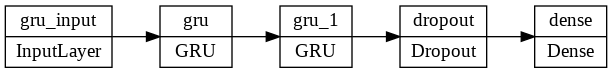

In [20]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [21]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 16s 7ms/step - loss: 2.3381 - mean_squared_error: 2.3381 - val_loss: 2.2530 - val_mean_squared_error: 2.2530
Epoch 2/100
1545/1545 [==============================] - 9s 6ms/step - loss: 2.1997 - mean_squared_error: 2.1997 - val_loss: 2.0761 - val_mean_squared_error: 2.0761
Epoch 3/100
1545/1545 [==============================] - 10s 6ms/step - loss: 2.0818 - mean_squared_error: 2.0818 - val_loss: 1.9931 - val_mean_squared_error: 1.9931
Epoch 4/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9960 - mean_squared_error: 1.9960 - val_loss: 1.9073 - val_mean_squared_error: 1.9073
Epoch 5/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9415 - mean_squared_error: 1.9415 - val_loss: 1.8805 - val_mean_squared_error: 1.8805
Epoch 6/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.8905 - mean_squared_error: 1.8905 - val_loss: 1.8207 - val_mean_squared_error: 1.8207
Epoch 

In [22]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [23]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6577 - mean_squared_error: 0.6577
MSE =  [0.6577155590057373, 0.6577155590057373]


In [24]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59137
RMSE,0.81100
R2,0.71279


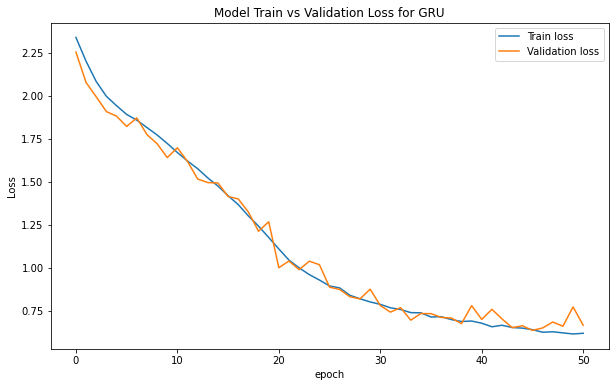

In [25]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(128,64),Dense2(128,1),Drop1,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1), return_sequences=True))
model_gru.add(Dense(128)) # output = 1|
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(GRU(64))
model_gru.add(Dense(1)) # output = 1
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

In [ ]:
confirm_result(y_test,y_pred)

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1,Dense1,**RMSprop**

In [26]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [27]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.2810 - val_loss: 2.2014
Epoch 2/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.1395 - val_loss: 2.2014
Epoch 3/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0457 - val_loss: 2.0243
Epoch 4/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9871 - val_loss: 1.9447
Epoch 5/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9392 - val_loss: 1.8997
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.8954 - val_loss: 1.9340
Epoch 7/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.8592 - val_loss: 1.8440
Epoch 8/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.8119 - val_loss: 1.8753
Epoch 9/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.7553 - val_loss: 1.7327
Epoch 10/100
1545/1545 [==============================] - 7s 4ms/step - 

In [28]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [29]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 2ms/step - loss: 0.6976
MSE =  0.6976352334022522


In [30]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59748
RMSE,0.83525
R2,0.69536


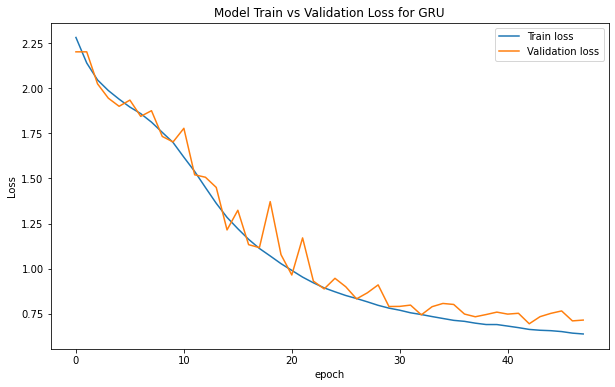

In [31]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

#LSTM

##LSTM1,Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


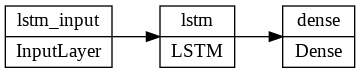

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 6s 11ms/step - loss: 0.6459 - mean_squared_error: 0.6459
[0.6458579897880554, 0.6458579897880554]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57157
RMSE,0.80365
R2,0.71797


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(128,32),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1), return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(32)) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 87,201
Trainable params: 87,201
Non-trainable params: 0
_________________________________________________________________


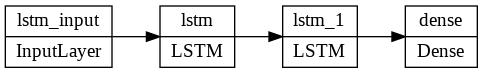

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 109s 54ms/step - loss: 2.1961 - mean_squared_error: 2.1961
Epoch 2/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.9841 - mean_squared_error: 1.9841
Epoch 3/100
1931/1931 [==============================] - 92s 48ms/step - loss: 1.8725 - mean_squared_error: 1.8725
Epoch 4/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.7512 - mean_squared_error: 1.7512
Epoch 5/100
1931/1931 [==============================] - 90s 47ms/step - loss: 1.6561 - mean_squared_error: 1.6561
Epoch 6/100
1931/1931 [==============================] - 90s 47ms/step - loss: 1.5761 - mean_squared_error: 1.5761
Epoch 7/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.4816 - mean_squared_error: 1.4816
Epoch 8/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.3396 - mean_squared_error: 1.3396
Epoch 9/100
1931/1931 [==============================] - 91s 47ms/step - loss: 

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 8s 17ms/step - loss: 0.6286 - mean_squared_error: 0.6286
[0.6285678148269653, 0.6285678148269653]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.54090
RMSE,0.79282
R2,0.72552


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

##LSTM1(256),Dense1,adam -t

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


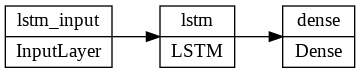

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 202s 104ms/step - loss: 2.1289 - mean_squared_error: 2.1289
Epoch 2/100
1931/1931 [==============================] - 183s 95ms/step - loss: 1.9559 - mean_squared_error: 1.9559
Epoch 3/100
1931/1931 [==============================] - 181s 94ms/step - loss: 1.8395 - mean_squared_error: 1.8395
Epoch 4/100
1931/1931 [==============================] - 181s 94ms/step - loss: 1.6932 - mean_squared_error: 1.6932
Epoch 5/100
1931/1931 [==============================] - 184s 95ms/step - loss: 1.5914 - mean_squared_error: 1.5914
Epoch 6/100
1931/1931 [==============================] - 186s 97ms/step - loss: 1.4795 - mean_squared_error: 1.4795
Epoch 7/100
1931/1931 [==============================] - 182s 94ms/step - loss: 1.3605 - mean_squared_error: 1.3605
Epoch 8/100
1931/1931 [==============================] - 181s 94ms/step - loss: 1.2229 - mean_squared_error: 1.2229
Epoch 9/100
1931/1931 [==============================] - 182s 94ms/step

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 15s 30ms/step - loss: 0.4942 - mean_squared_error: 0.4942
[0.4942288100719452, 0.4942288100719452]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.46649
RMSE,0.70301
R2,0.78418


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(256),Dense1,RMSprop -t

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


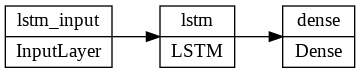

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 198s 101ms/step - loss: 2.1242 - mean_squared_error: 2.1242
Epoch 2/100
1931/1931 [==============================] - 196s 101ms/step - loss: 1.9134 - mean_squared_error: 1.9134
Epoch 3/100
1931/1931 [==============================] - 198s 102ms/step - loss: 1.7707 - mean_squared_error: 1.7707
Epoch 4/100
1931/1931 [==============================] - 198s 102ms/step - loss: 1.6408 - mean_squared_error: 1.6408
Epoch 5/100
1931/1931 [==============================] - 203s 105ms/step - loss: 1.5304 - mean_squared_error: 1.5304
Epoch 6/100
1931/1931 [==============================] - 197s 102ms/step - loss: 1.4412 - mean_squared_error: 1.4412
Epoch 7/100
1931/1931 [==============================] - 199s 103ms/step - loss: 1.3551 - mean_squared_error: 1.3551
Epoch 8/100
1931/1931 [==============================] - 198s 103ms/step - loss: 1.2743 - mean_squared_error: 1.2743
Epoch 9/100
1931/1931 [==============================] - 198s 10

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 16s 33ms/step - loss: 0.5025 - mean_squared_error: 0.5025
[0.5024903416633606, 0.5024903416633606]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.47089
RMSE,0.70887
R2,0.78057


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(256,32),Dense1,adam -t

In [21]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 301,217
Trainable params: 301,217
Non-trainable params: 0
_________________________________________________________________


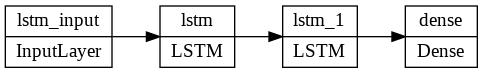

In [22]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [23]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 208s 102ms/step - loss: 2.1607 - mean_squared_error: 2.1607
Epoch 2/100
1931/1931 [==============================] - 196s 101ms/step - loss: 1.8865 - mean_squared_error: 1.8865
Epoch 3/100
1931/1931 [==============================] - 194s 101ms/step - loss: 1.8077 - mean_squared_error: 1.8077
Epoch 4/100
1931/1931 [==============================] - 197s 102ms/step - loss: 1.6842 - mean_squared_error: 1.6842
Epoch 5/100
1931/1931 [==============================] - 196s 101ms/step - loss: 1.5403 - mean_squared_error: 1.5403
Epoch 6/100
1931/1931 [==============================] - 194s 101ms/step - loss: 1.3668 - mean_squared_error: 1.3668
Epoch 7/100
1931/1931 [==============================] - 194s 100ms/step - loss: 1.2125 - mean_squared_error: 1.2125
Epoch 8/100
1931/1931 [==============================] - 194s 101ms/step - loss: 1.1122 - mean_squared_error: 1.1122
Epoch 9/100
1931/1931 [==============================] - 192s 10

In [24]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [25]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 16s 31ms/step - loss: 2.6991 - mean_squared_error: 2.6991
[2.6991159915924072, 2.6991159915924072]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.45792
RMSE,0.69911
R2,0.78657


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(256,32),Dense1,RMSprop -t

In [100]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 301,217
Trainable params: 301,217
Non-trainable params: 0
_________________________________________________________________


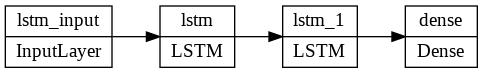

In [101]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [102]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 42s 25ms/step - loss: 2.2745 - mean_squared_error: 2.2745 - val_loss: 2.2487 - val_mean_squared_error: 2.2487
Epoch 2/100
1545/1545 [==============================] - 37s 24ms/step - loss: 2.2061 - mean_squared_error: 2.2061 - val_loss: 2.1158 - val_mean_squared_error: 2.1158
Epoch 3/100
1545/1545 [==============================] - 37s 24ms/step - loss: 2.0678 - mean_squared_error: 2.0678 - val_loss: 2.0674 - val_mean_squared_error: 2.0674
Epoch 4/100
1545/1545 [==============================] - 37s 24ms/step - loss: 2.0337 - mean_squared_error: 2.0337 - val_loss: 2.0327 - val_mean_squared_error: 2.0327
Epoch 5/100
1545/1545 [==============================] - 37s 24ms/step - loss: 1.9867 - mean_squared_error: 1.9867 - val_loss: 1.9905 - val_mean_squared_error: 1.9905
Epoch 6/100
1545/1545 [==============================] - 37s 24ms/step - loss: 1.9372 - mean_squared_error: 1.9372 - val_loss: 1.9171 - val_mean_squared_error: 1.917

In [103]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [104]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 4s 9ms/step - loss: 0.5714 - mean_squared_error: 0.5714
[0.571444034576416, 0.571444034576416]


In [105]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51907
RMSE,0.75594
R2,0.75046


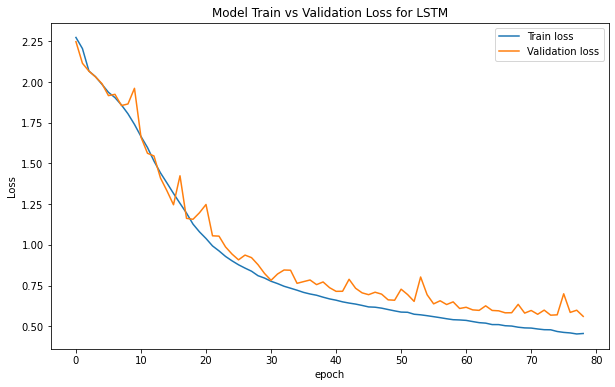

In [106]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


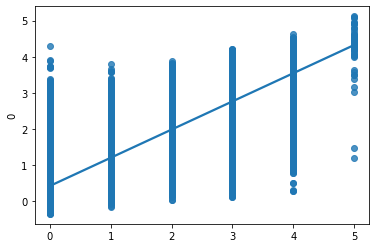

In [107]:
import seaborn as sns

#create scatterplot with regression line and confidence interval lines
sns.regplot(y_test, y_pred)

##LSTM2(256,128),Dense1,adam -t

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


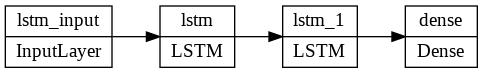

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 312s 157ms/step - loss: 2.1047 - mean_squared_error: 2.1047
Epoch 2/100
1931/1931 [==============================] - 302s 156ms/step - loss: 1.9456 - mean_squared_error: 1.9456
Epoch 3/100
1931/1931 [==============================] - 305s 158ms/step - loss: 1.8178 - mean_squared_error: 1.8178
Epoch 4/100
1931/1931 [==============================] - 307s 159ms/step - loss: 1.6781 - mean_squared_error: 1.6781
Epoch 5/100
1931/1931 [==============================] - 305s 158ms/step - loss: 1.5603 - mean_squared_error: 1.5603
Epoch 6/100
1931/1931 [==============================] - 307s 159ms/step - loss: 1.4158 - mean_squared_error: 1.4158
Epoch 7/100
1931/1931 [==============================] - 304s 157ms/step - loss: 1.2418 - mean_squared_error: 1.2418
Epoch 8/100
1931/1931 [==============================] - 304s 157ms/step - loss: 1.1351 - mean_squared_error: 1.1351
Epoch 9/100
1931/1931 [==============================] - 302s 15

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 25s 49ms/step - loss: 0.4953 - mean_squared_error: 0.4953
[0.49530327320098877, 0.49530327320098877]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.45629
RMSE,0.70378
R2,0.78371


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(256,128),Dense1,RMSprop -t

In [15]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


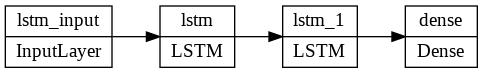

In [16]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [17]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 312s 159ms/step - loss: 2.1114 - mean_squared_error: 2.1114
Epoch 2/100
1931/1931 [==============================] - 308s 160ms/step - loss: 1.9317 - mean_squared_error: 1.9317
Epoch 3/100
1931/1931 [==============================] - 313s 162ms/step - loss: 1.7991 - mean_squared_error: 1.7991
Epoch 4/100
1931/1931 [==============================] - 313s 162ms/step - loss: 1.6986 - mean_squared_error: 1.6986
Epoch 5/100
1931/1931 [==============================] - 312s 162ms/step - loss: 1.5877 - mean_squared_error: 1.5877
Epoch 6/100
1931/1931 [==============================] - 314s 163ms/step - loss: 1.4635 - mean_squared_error: 1.4635
Epoch 7/100
1931/1931 [==============================] - 315s 163ms/step - loss: 1.3614 - mean_squared_error: 1.3614
Epoch 8/100
1931/1931 [==============================] - 312s 162ms/step - loss: 1.2661 - mean_squared_error: 1.2661
Epoch 9/100
1931/1931 [==============================] - 316s 16

In [18]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [19]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 28s 55ms/step - loss: 0.4233 - mean_squared_error: 0.4233
[0.4232633709907532, 0.4232633709907532]


In [20]:
confirm_result(y_test,y_pred)

,Results
MAE,0.43315
RMSE,0.65059
R2,0.81517


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(512),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(512, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


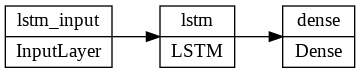

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 688s 355ms/step - loss: 2.1150 - mean_squared_error: 2.1150
Epoch 2/100
1931/1931 [==============================] - 679s 352ms/step - loss: 1.9206 - mean_squared_error: 1.9206
Epoch 3/100
1931/1931 [==============================] - 673s 348ms/step - loss: 1.7840 - mean_squared_error: 1.7840
Epoch 4/100
1931/1931 [==============================] - 692s 359ms/step - loss: 1.6467 - mean_squared_error: 1.6467
Epoch 5/100
1931/1931 [==============================] - 694s 359ms/step - loss: 1.5329 - mean_squared_error: 1.5329
Epoch 6/100
1931/1931 [==============================] - 696s 360ms/step - loss: 1.3989 - mean_squared_error: 1.3989
Epoch 7/100
1931/1931 [==============================] - 700s 362ms/step - loss: 1.2531 - mean_squared_error: 1.2531
Epoch 8/100
1931/1931 [==============================] - 695s 360ms/step - loss: 1.1128 - mean_squared_error: 1.1128
Epoch 9/100
1931/1931 [==============================] - 700s 36

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 35s 70ms/step - loss: 0.4993 - mean_squared_error: 0.4993
[0.4993188679218292, 0.4993188679218292]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.45948
RMSE,0.70663
R2,0.78196


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1,Dense1,RMSprop

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
#model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1931/1931 [==============================] - 62s 31ms/step - loss: 2.1334
Epoch 2/100
1931/1931 [==============================] - 68s 35ms/step - loss: 1.9819
Epoch 3/100
1931/1931 [==============================] - 81s 42ms/step - loss: 1.8896
Epoch 4/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.7860
Epoch 5/100
1931/1931 [==============================] - 75s 39ms/step - loss: 1.6695
Epoch 6/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.5756
Epoch 7/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.4890
Epoch 8/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.4203
Epoch 9/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.3556
Epoch 10/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.2929
Epoch 11/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.2311
Epoch 12/100
1931/1931 [============================

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 6s 11ms/step - loss: 0.6420
0.6420155167579651


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57135
RMSE,0.80126
R2,0.71964


In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

# AdaBoostGRU

##AdaBoostGRU(128),Dense1(tree2)

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.0
    Uninstalling importlib-metadata-4.11.0:
      Successfully uninstalled importlib-metadata-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=2, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/100
1931/1931 [==============================] - 79s 35ms/step - loss: 2.1299 - mean_squared_error: 2.1299
Epoch 2/100
1931/1931 [==============================] - 55s 28ms/step - loss: 1.9499 - mean_squared_error: 1.9499
Epoch 3/100
1931/1931 [==============================] - 51s 27ms/step - loss: 1.8487 - mean_squared_error: 1.8487
Epoch 4/100
1931/1931 [==============================] - 54s 28ms/step - loss: 1.6908 - mean_squared_error: 1.6908
Epoch 5/100
1931/1931 [==============================] - 51s 27ms/step - loss: 1.5332 - mean_squared_error: 1.5332
Epoch 6/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.3914 - mean_squared_error: 1.3914
Epoch 7/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.2451 - mean_squared_error: 1.2451
Epoch 8/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.1323 - mean_squared_error: 1.1323
Epoch 9/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 53s 27ms/step - loss: 0.6577 - mean_squared_error: 0.6577
Epoch 2/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.5435 - mean_squared_error: 0.5435
Epoch 3/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.4940 - mean_squared_error: 0.4940
Epoch 4/100
1931/1931 [==============================] - 61s 32ms/step - loss: 0.4840 - mean_squared_error: 0.4840
Epoch 5/100
1931/1931 [==============================] - 52s 27ms/step - loss: 0.4596 - mean_squared_error: 0.4596
Epoch 6/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.4365 - mean_squared_error: 0.4365
Epoch 7/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4325 - mean_squared_error: 0.4325
Epoch 8/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4217 - mean_squared_error: 0.4217
Epoch 9/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4066 - mean

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7fc06d53bb00>, epochs=100),
                  n_estimators=2, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

483/483 [==============================] - 6s 11ms/step
0.7406253395762763


##AdaBoostGRU(128), Dense1(tree 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_ada = model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 55s 27ms/step - loss: 2.1015 - mean_squared_error: 2.1015
Epoch 2/100
1931/1931 [==============================] - 62s 32ms/step - loss: 1.9662 - mean_squared_error: 1.9662
Epoch 3/100
1931/1931 [==============================] - 53s 28ms/step - loss: 1.8726 - mean_squared_error: 1.8726
Epoch 4/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.7543 - mean_squared_error: 1.7543
Epoch 5/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.6168 - mean_squared_error: 1.6168
Epoch 6/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.4983 - mean_squared_error: 1.4983
Epoch 7/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.4182 - mean_squared_error: 1.4182
Epoch 8/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.3376 - mean_squared_error: 1.3376
Epoch 9/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.2549 - mean

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7f0e5ad077a0>, epochs=100),
                  n_estimators=1, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

483/483 [==============================] - 4s 9ms/step
0.725080248542451


In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ada.history['loss'],'y',label='ada', color='green')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

### Overfitting Solution
(1) 학습 데이터 부족

(2) Model Capacity가 높을 때(= 파라미터 개수가 많을 때)

#### 1. Model Capacity
Hidden Layer, Node 수를 줄이는 방법
- unit 128 -> 64

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=64,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 31s 15ms/step - loss: 2.1831 - mean_squared_error: 2.1831
Epoch 2/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.9864 - mean_squared_error: 1.9864
Epoch 3/65
1931/1931 [==============================] - 31s 16ms/step - loss: 1.9334 - mean_squared_error: 1.9334
Epoch 4/65
1931/1931 [==============================] - 30s 16ms/step - loss: 1.8534 - mean_squared_error: 1.8534
Epoch 5/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.7685 - mean_squared_error: 1.7685
Epoch 6/65
1931/1931 [==============================] - 30s 15ms/step - loss: 1.6812 - mean_squared_error: 1.6812
Epoch 7/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.6113 - mean_squared_error: 1.6113
Epoch 8/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.5449 - mean_squared_error: 1.5449
Epoch 9/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.4818 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1705b00>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 2s 5ms/step


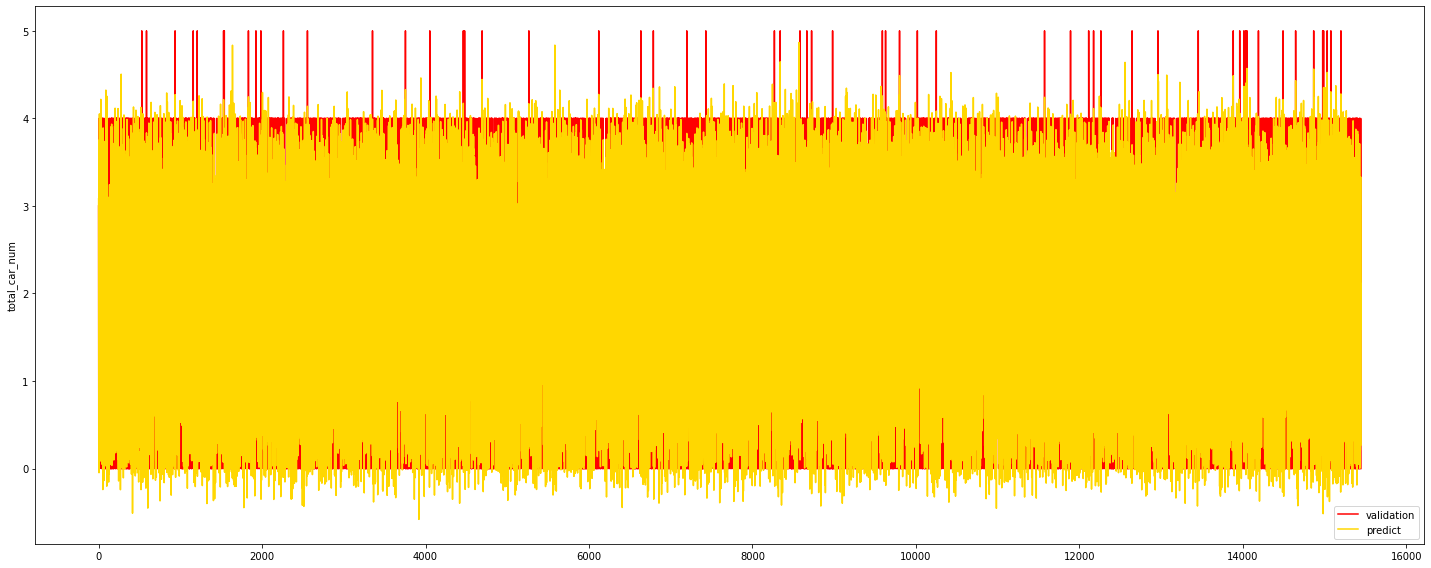

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 3s 5ms/step
0.6865512247310462


#### 2. L2 Regularization
가중치 제곱에 비례하는 노이즈를 오차함수에 추가
- from keras import regularizers
- kernel_regularizer = regularizers.l2(0.00001)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras import regularizers

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,kernel_regularizer = regularizers.l2(0.00001),input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 50s 25ms/step - loss: 2.1294 - mean_squared_error: 2.1293
Epoch 2/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.9584 - mean_squared_error: 1.9583
Epoch 3/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.8639 - mean_squared_error: 1.8638
Epoch 4/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.8048 - mean_squared_error: 1.8046
Epoch 5/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.7020 - mean_squared_error: 1.7018
Epoch 6/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.5706 - mean_squared_error: 1.5704
Epoch 7/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.4437 - mean_squared_error: 1.4435
Epoch 8/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.3451 - mean_squared_error: 1.3448
Epoch 9/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.2540 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1f05a70>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 6s 11ms/step


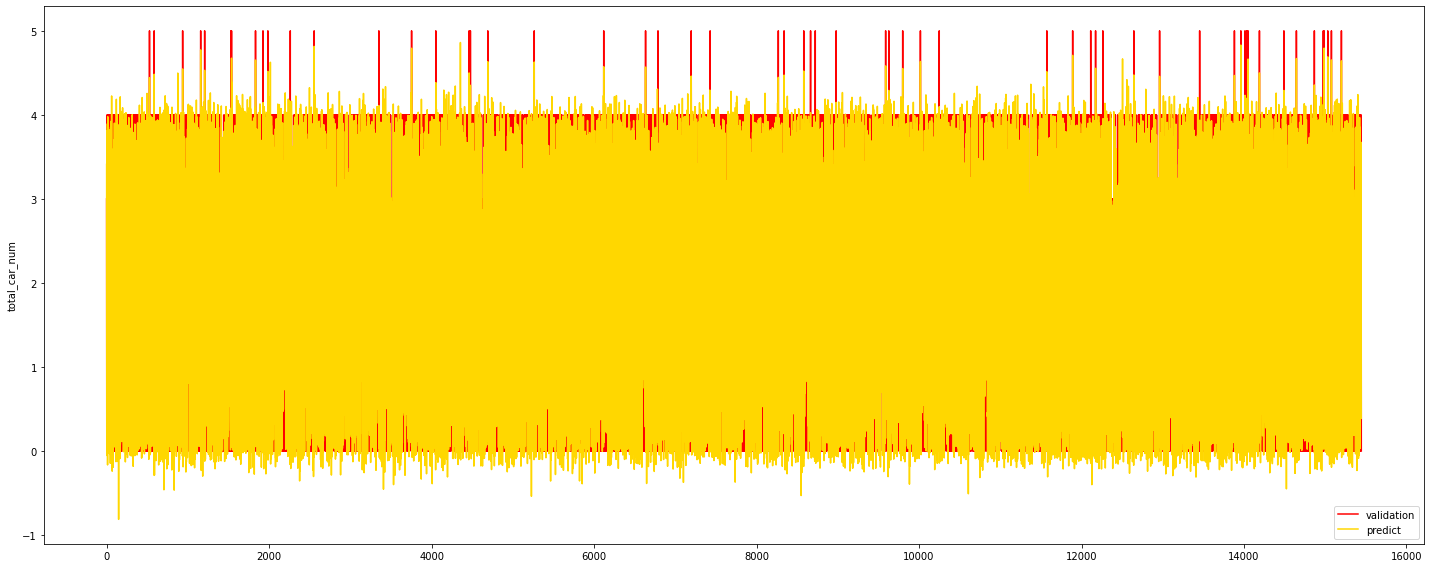

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 4s 8ms/step
0.7267820752592535


#### 3. Dropout
train 동안 네트워크 일부 생략, epoch마다 drop되는 node 무작위
- model.add(layers.Dropout(0.5))

In [ ]:
import tensorflow as tf
#from keras import models, layers
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras import regularizers

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(layers.Dropout(0.5))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 49s 24ms/step - loss: 2.2003 - mean_squared_error: 2.2003
Epoch 2/65
1931/1931 [==============================] - 46s 24ms/step - loss: 2.0100 - mean_squared_error: 2.0100
Epoch 3/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.9328 - mean_squared_error: 1.9328
Epoch 4/65
1931/1931 [==============================] - 47s 25ms/step - loss: 1.8270 - mean_squared_error: 1.8270
Epoch 5/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.7267 - mean_squared_error: 1.7267
Epoch 6/65
1931/1931 [==============================] - 48s 25ms/step - loss: 1.6292 - mean_squared_error: 1.6292
Epoch 7/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.5460 - mean_squared_error: 1.5460
Epoch 8/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.4690 - mean_squared_error: 1.4690
Epoch 9/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.3940 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1f5e5f0>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 6s 12ms/step


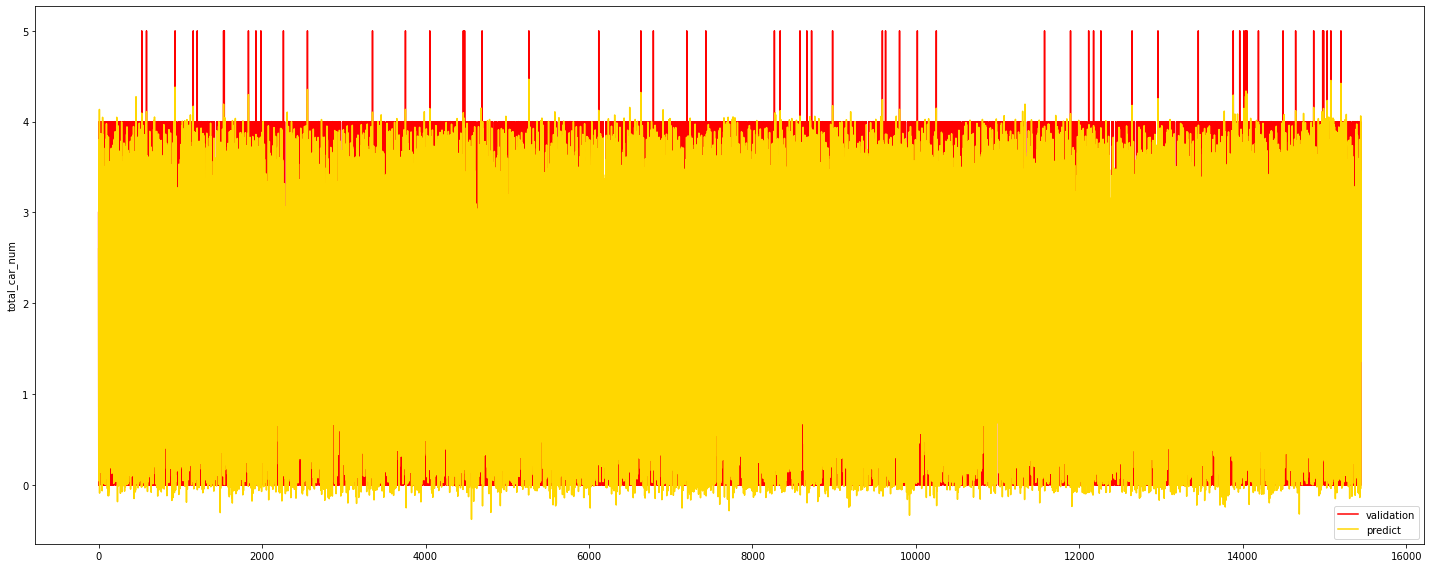

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 4s 8ms/step
0.7320248934273688


#Result-Loss

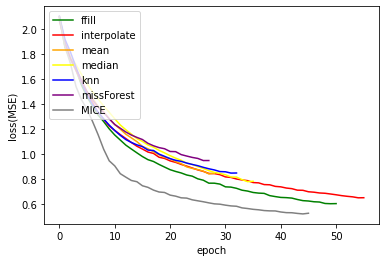

In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ffill.history['loss'],'y',label='ffill', color='green')
loss_ax.plot(hist_interpolate.history['loss'],'y',label='interpolate', color='red')
loss_ax.plot(hist_mean.history['loss'],'y',label='mean', color='orange')
loss_ax.plot(hist_median.history['loss'],'y',label='median', color='yellow')
loss_ax.plot(hist_knn.history['loss'],'y',label='knn', color='blue')
loss_ax.plot(hist_missForest.history['loss'],'y',label='missForest', color='purple')
loss_ax.plot(hist_mice.history['loss'],'y',label='MICE', color='gray')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

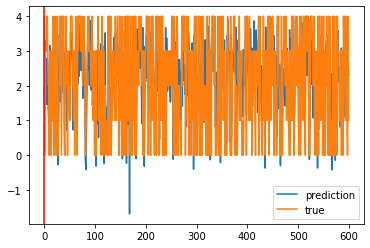

In [ ]:
preds = model.predict(X_test_t)

plt.plot(preds[:600], label='prediction')
plt.plot(y_test[:600], label='true')
plt.axvline(x=len(y_test)-len(preds), color='r')
plt.legend()
plt.show()